In [1]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
current_image = "/Users/Kristen/Desktop/06212016_WYK8440_Scaled_plusG1/5_seconds_1/processedImages/Cell_1/Targets_crop.tif" 

In [3]:
im = Image.open(current_image)

In [4]:
im.show()

In [5]:
im_sharp = im.filter(ImageFilter.SHARPEN)

In [6]:
im.show()

In [7]:
im_sharp.show()

<type 'numpy.ndarray'> (512, 512, 3) float32



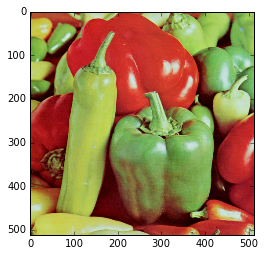

In [2]:
%matplotlib inline

im = plt.imread("/Users/Kristen/Image-Analysis-in-Python/sample-images/peppers.png") #
print type(im), im.shape, im.dtype
print
plt.imshow(im)

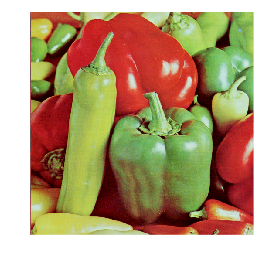

In [3]:
#writing your own show function might be useful if you want to see images in a specific way without always having to 
    #change the matplotlib preferences
def my_imshow(im, title=None, **kwargs):
    if 'cmap' not in kwargs:
        kwargs['cmap'] = 'gray'
    plt.figure()
    plt.imshow(im, interpolation='none', **kwargs)
    if title: 
        plt.title(title)
    plt.axis('off')
    
my_imshow(im)

manipulate pixels the same way as you do with numpy arrays (basically an image is just an array of pixel intensities)

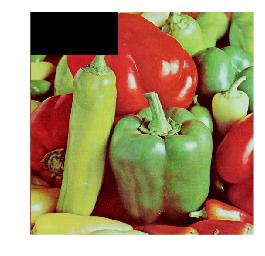

In [8]:
im[:100, :200, :] = 0
my_imshow(im)

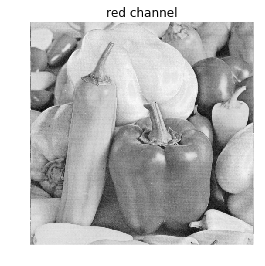

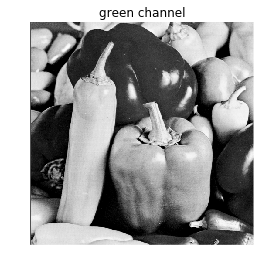

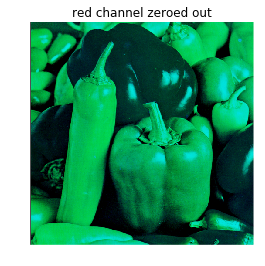

In [4]:
im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/peppers.png')
red = im[..., 0] #dont understand what this means
green = im[..., 1] 

#the notes say that the '...' syntax means it covers 'all the dimensions except the last one'
#does that mean the last digit in the brackets?
#oooooh I got it. im.shape = [512, 512, 3]. Show me 512, 512, but for the last dimension (3) only show me the 0th (red)
    #or 1th (green) or 2th (blue) 

my_imshow(red, 'red channel') #string is title
plt.show()

my_imshow(green, 'green channel')

im[:,:,0] = 0 #all the values in the 2d array 512,512 and the 0th of the 3rd dimension (red) make equal 0 (overwrite
    #the pixel intensity values with 0)
    
my_imshow(im, 'red channel zeroed out')

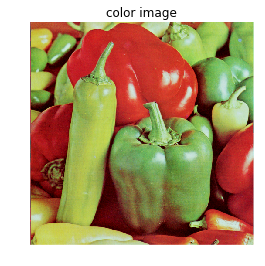

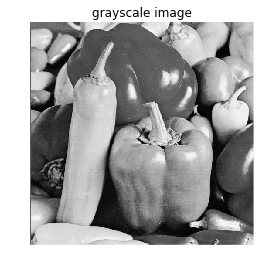

In [5]:
from skimage.color import rgb2gray

im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/peppers.png')
gray_im = rgb2gray(im)

my_imshow(im, title='color image')
my_imshow(gray_im, title='grayscale image')

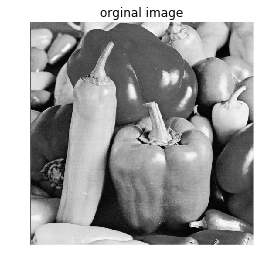

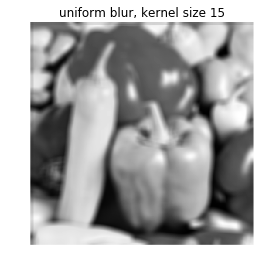

In [6]:
from skimage import filters
from scipy.ndimage.filters import convolve
from skimage import color

im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/peppers.png')
gray_im = color.rgb2gray(im)

#uniform blur
kern_size = 15
kernel = np.ones((kern_size, kern_size))/kern_size**2 #a uniform filter will produce a simple average
    # I dont understand whats happening to the array of ones in this situation..
    # its making a 15x15 array of ones and then each of those 1s are being divided by 15^2, because this is the
        #average somehow?
        
uniform_blurred = convolve(gray_im, kernel)

my_imshow(gray_im, 'orginal image')
my_imshow(uniform_blurred, 'uniform blur, kernel size %i' % kern_size)

[ 0.011109    0.02279418  0.04393693  0.07955951  0.13533528  0.21626517
  0.32465247  0.45783336  0.60653066  0.7548396   0.8824969   0.96923323
  1.          0.96923323  0.8824969   0.7548396   0.60653066  0.45783336
  0.32465247  0.21626517  0.13533528  0.07955951  0.04393693  0.02279418
  0.011109  ] (25,)
(25, 25)
gaussian


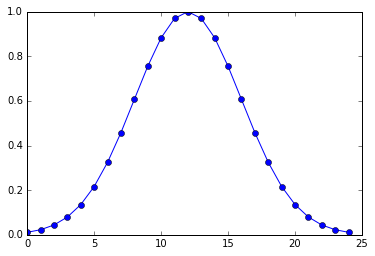

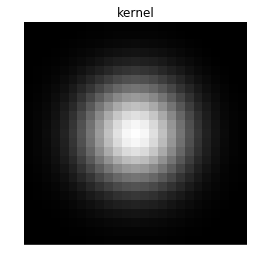

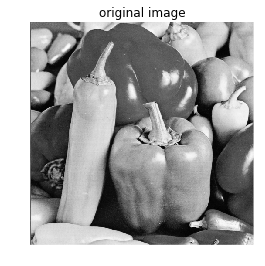

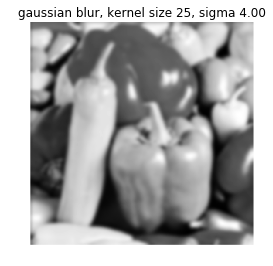

In [9]:
from scipy.signal import gaussian

#gaussian blur

kern_size = 25 #this is the number of points in the output window
sigma = 4 #this is the std
kernel_1d = gaussian(kern_size, sigma) #this is the kernel to ultimately do the blur with. Builds a matrix
print kernel_1d, kernel_1d.shape
kernel = np.outer(kernel_1d, kernel_1d)
print kernel.shape
gauss_blurred = convolve(gray_im, kernel)

print 'gaussian'
plt.plot(kernel_1d, 'o-')
my_imshow(kernel, 'kernel')
my_imshow(gray_im, 'original image')
my_imshow(gauss_blurred, 'gaussian blur, kernel size %i, sigma %.2f' %(kern_size, sigma))

In image processing, a kernel, convolution matrix, or mask is a small matrix useful for blurring, sharpening, embossing, edge detection, and more. This is accomplished by means of convolution between a kernel and an image. (wikipedia)

np.outer:
Given two vectors, a = [a0, a1, ..., aM] and b = [b0, b1, ..., bN], the outer product [R55] is:

[[a0*b0  a0*b1 ... a0*bN ]
 [a1*b0    .
 [ ...          .
 [aM*b0            aM*bN ]]

Note: Both the uniform blur and the gaussian blur have efficient library implementations. In the above examples, I used explicit convolution calls to illustrate how these library functions work "under the hood". In production, you should use the library functions uniform filter and gaussian_filter to do blurring. scipy.ndimage also has a number of useful filtering functions which will work on 3D images.

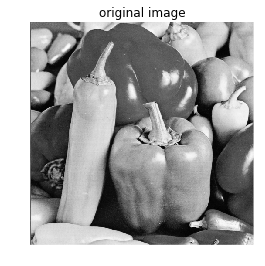

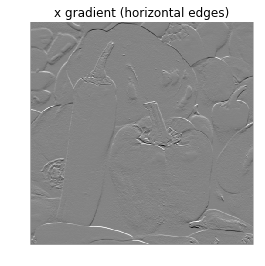

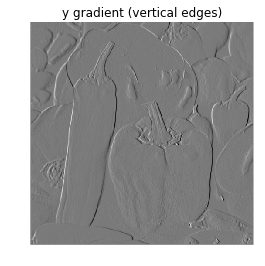

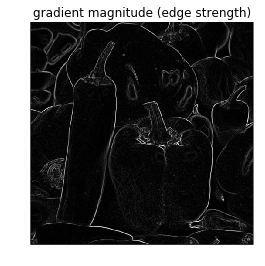

In [7]:
#Filtering: Gradients
from skimage import filters

grad_x = filters.sobel_h(gray_im) #Find the horizontal edges of an image using the Sobel transform.
grad_y = filters.sobel_v(gray_im) #	Find the vertical edges of an image using the Sobel transform.
grad_mag = np.sqrt(grad_x**2 + grad_y**2) 
    #At each point in the image, the resulting gradient approximations can be combined to give the gradient magnitude, using:
            # G = sqrt(grad_x**2 + grad_y**2)
    #make a np.array because that's what the image is

my_imshow(gray_im, 'original image')
my_imshow(grad_x, "x gradient (horizontal edges)")
my_imshow(grad_y, 'y gradient (vertical edges)')
my_imshow(grad_mag, 'gradient magnitude (edge strength)')

The Sobel operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


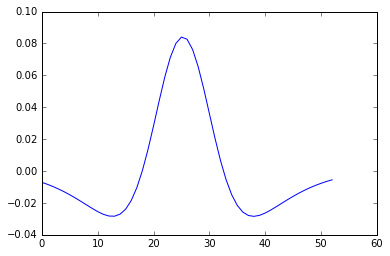

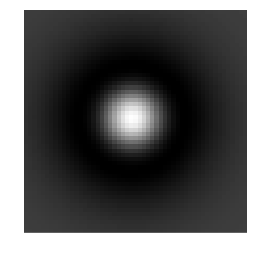

In [8]:
#Filtering: Blob Detection
    #difference of gaussians (dog)
    
sigma_1 = 7.
sigma_2 = 2.5*sigma_1
kern_size = 3*sigma_2

x,y = np.mgrid[-kern_size/2+1:kern_size/2+1, -kern_size/2+1:kern_size/2+1]
rsqr = x**2 + y**2 #what is rsqr?
gaussian_1 = np.exp(-rsqr/sigma_1**2)/sigma_1
gaussian_2 = np.exp(-rsqr/sigma_2**2)/sigma_2
dog_kern = gaussian_1 - gaussian_2

plt.figure()
plt.plot(dog_kern[:, kern_size/2])

my_imshow(dog_kern)

http://eli.thegreenplace.net/2014/meshgrids-and-disambiguating-rows-and-columns-from-cartesian-coordinates/

Explains meshgrids

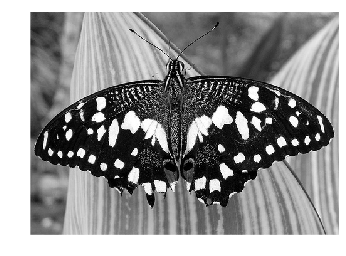

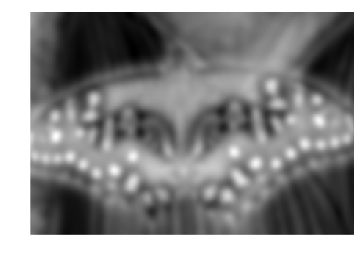

In [9]:
from scipy.signal import fftconvolve #fftconvolve is usually much faster than plain convolve (they do the same thing)

im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/butterfly.png')
gray_im = color.rgb2gray(im)

blob_im =fftconvolve(gray_im, dog_kern, mode='valid')

my_imshow(gray_im)
my_imshow(blob_im)

(array([  4.00000000e+01,   1.79000000e+02,   4.00000000e+02,
          7.74000000e+02,   1.33800000e+03,   2.07900000e+03,
          2.99900000e+03,   3.84700000e+03,   4.55500000e+03,
          4.58400000e+03,   4.69000000e+03,   4.27500000e+03,
          3.87800000e+03,   3.28200000e+03,   2.82400000e+03,
          2.30300000e+03,   2.08700000e+03,   1.94800000e+03,
          1.91000000e+03,   1.92600000e+03,   2.09400000e+03,
          2.05300000e+03,   2.14600000e+03,   2.11700000e+03,
          2.14400000e+03,   2.22200000e+03,   2.52000000e+03,
          2.67000000e+03,   3.09900000e+03,   3.60300000e+03,
          4.30000000e+03,   4.44600000e+03,   4.15700000e+03,
          3.93600000e+03,   3.54400000e+03,   3.22200000e+03,
          3.08900000e+03,   3.19000000e+03,   3.13300000e+03,
          3.38700000e+03,   3.64800000e+03,   4.26100000e+03,
          4.89100000e+03,   5.10400000e+03,   5.08500000e+03,
          4.79500000e+03,   4.27600000e+03,   4.25600000e+03,
        

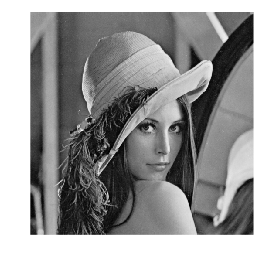

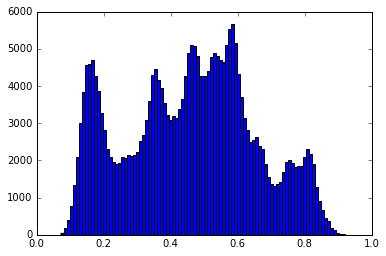

In [10]:
#Thresholding
%matplotlib inline

im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/lena.png')
gray_im = color.rgb2gray(im)

my_imshow(gray_im)

plt.figure()
plt.hist(gray_im.ravel(), bins=100)
#the .ravel() is doing some kind of flattening. Don't know why or what the benefit is... Well it wont plot with out it.
    #it must somehow be making the gray_im much less complex so that its plot-able


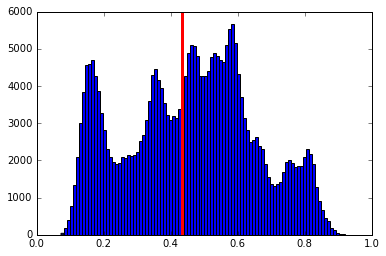

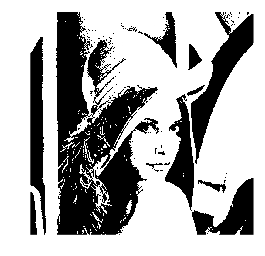

In [12]:
# use otsu's algorithm to select threshold

thresh = filters.threshold_otsu(gray_im)
thresholded = gray_im > thresh 
    # make a new array but only of the values in gray that are greater than the thresh values
    # looking for spots greater than the threshold

plt.figure()
plt.hist(gray_im.ravel(), bins=100)
plt.plot([thresh,thresh], [0,6000], linewidth=3, color='r')

my_imshow(thresholded)

thresh=  0.530300981501


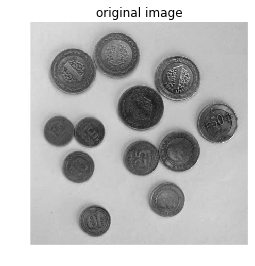

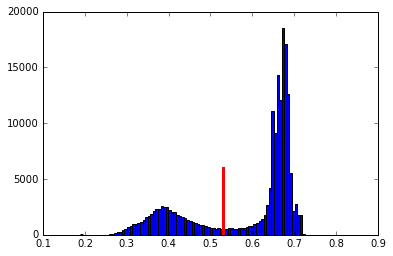

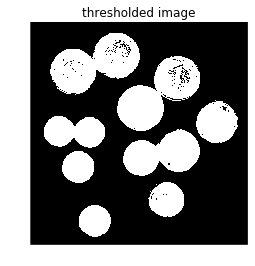

In [15]:
## dark on bright background
im = plt.imread('/Users/Kristen/Image-Analysis-in-Python/sample-images/coins.png')
gray_im = color.rgb2gray(im)
thresh = filters.threshold_otsu(gray_im)
print 'thresh= ', thresh
coins = gray_im < thresh #look for spots less-than the threshold

my_imshow(gray_im, 'original image')

plt.figure()
plt.hist(gray_im.ravel(), bins=100)
plt.plot([thresh, thresh], [0,6000], linewidth=3, color='r')

my_imshow(coins, 'thresholded image')